# Permutation (randomization) and bootstrapping...non-parametraic statistics. 

## Developing test statistics and their distributions
In parametric NHT stats, we assume that there is some distribution (e.g. a t-distribution) that tracks the true population distribution given a fixed sample size. Then we make a few measurements from our sample population and we see how likely our measurement is compared to this hypothetical population distribution. 

Why do we make this comparison of our sample mean against some hypothetical function (t-distribution)? Why not just collect our data, and if we collect enough of it, then we can just directly evaluate our confidence in the summary mean (and also differences between conditions) without resorting to comparing with hypothetical distributions...and we can do this using just the data we have in hand (assuming a few basic conditions are met). This seems like a good idea, and given that resampling methods are increasingly computationally tractable its almost always a better choice.

## Randomization tests
In a typical study, you collect data from two groups (or more) and then
you want to decide if the two group means are different given the separation 
of their means and their variances. So you compute the differences
between the means, weight that difference by the variance, and then
compare that test statistic again a standard look up table (e.g. a
t-distribution or similar) to get a p-value.  
This standard approach makes a number of assumptions:
* The data are normally distributed so that the test stat follows the expected distribution (i.e. a t-distribution)
* that we have taken truly random samples from the population(s) so that we can genearlize our results to the entire population
* The normal null hypothesis that mu1=mu2 based on where the difference between means falls against a standard statistic distribution (like the t-table). As the result of assumptions 1 and 2, we are then supposed  to infer that if we get a p<0.05 (or whatever the magic number is), then we can make an inference about the entire population (i.e. *inferential* stat).

In contrast, *RANDOMIZATION TESTING* does away with most of these assumptions in place of a different approach.
* We do not need normally distributed data, etc. In fact, we rarely seem to meet these conditions in real data anyway, so this is a pretty handy thing.
* We are not interested in making population inferences or accuractely estimate population means/std etc (see bootstrapping section below for that)  

The test statistic that we generate is not compared to a standard look up table - instead we generate our own 'null' distribution against which to compare the data that we actually observe with the goal of evaluating the propbability of observing a mean difference of X given that our condition labels (or our manipulation) had no effect. Under this null, the data could equally likely have come from either distribution, and this is the null hypothesis that we are often actually testing.

## Import our standard numpy and plotting stuff...also stats from scipy

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Start by generating some fake data from two experimental conditions. 

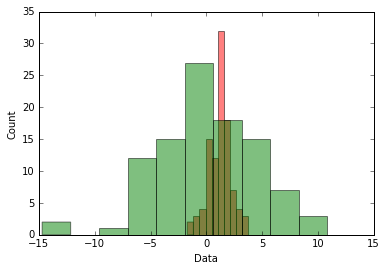

t-value:  2.39  p-value:  0.0185622


In [79]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = 1.1,1     # means of each distribution
var_of_conditions = 1,1      # variance of each distribution - start with equal variance

# then use random.randn to generate two data sets with specified 
d1 = (np.random.randn(N,) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,) * var_of_conditions[1]) + mu_of_conditions[1]

# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(d1, color='r', alpha=.5)
plt.hist(d2, color='g', alpha=.5)
plt.xlabel('Data')
plt.ylabel('Count')
plt.show()

t_val = stats.ttest_rel(d1,d2)
print('t-value: ', np.round(t_val.statistic,2), ' p-value: ', np.round(t_val.pvalue,8))

## now generate a set of t-values across repeated iterations of this 'study'

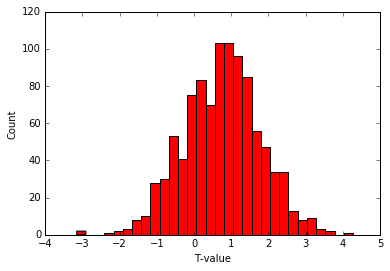

In [65]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = 1.1,1      # means of each distribution
var_of_conditions = 1,1     # variance of each distribution - start with equal variance, then make unequal

# number of repeats of the study
num_studies = 1000

# allocate array for storing t-values
study_t_val = np.zeros(num_studies)

for i in np.arange(num_studies):
    # then use random.randn to generate two data sets with specified 
    d1 = (np.random.randn(N,) * var_of_conditions[0]) + mu_of_conditions[0]
    d2 = (np.random.randn(N,) * var_of_conditions[1]) + mu_of_conditions[1]

    t_val = stats.ttest_rel(d1,d2)
    
    # store the t-value each time...
    study_t_val[i] = t_val.statistic
    
# histogram to show the data. 
# can specify the number of bins to use in the call to plt.hist
plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

## now do this the faster, numpy way...ditch the loop

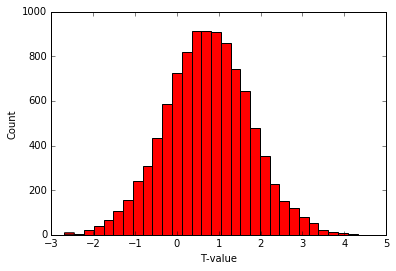

In [89]:
N = 100                     # number of data points (or 'subjects')
mu_of_conditions = 1.1,1      # means of each distribution
var_of_conditions = 1,1     # variance of each distribution - start with equal variance, then make unequal

# number of times we repeat the study
num_studies = 10000

# then use random.randn to generate two data sets with specified 
# instead of looping generate a N x num_studies matrix all at once 
d1 = (np.random.randn(N,num_studies) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,num_studies) * var_of_conditions[1]) + mu_of_conditions[1]

# do the t-test on all columns of data (i.e. across rows, or across the first dim)
t_val = stats.ttest_rel(d1,d2,axis=0)
    
# store the t-value each time...
study_t_val = t_val.statistic       
    
# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

## Now start doing this with a randomization test
* Start: we'll generate only one set of experimental data
* Then we'll compute and store the t-value

In [115]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = 1.5,1       # means of each distribution
var_of_conditions = 1,1      # variance of each distribution - start with equal variance, then make unequal

# number of times we repeat the the study - set to 1 for this demo of the randomization test
# as if you just collected your data set and then you're sitting down to do the stats. 
num_studies = 1

# make our data sets
d1 = (np.random.randn(N,num_studies) * var_of_conditions[0]) + mu_of_conditions[0]
d2 = (np.random.randn(N,num_studies) * var_of_conditions[1]) + mu_of_conditions[1]

# do the t-test on all columns of data
# will write out the formula for the t-test here because it will make the randomization code 
# easier to understand: mean difference divided by the S.E. of the difference
study_t_val = np.mean(d1-d2, axis=0) / (np.std(d1-d2, axis=0) / np.sqrt(N-1))

# compute our p-value using stats.t.cdf
p_value = 2*(1-stats.t.cdf(study_t_val, N-1))

# print out our test statistic and our p-value
print('Tval: ', study_t_val, 'Pval: ', p_value)

Tval:  [ 3.97118942] Pval:  [ 0.00013572]


### now generate the actual distribution of your test statistic under the null that your experimental conditions don't matter
* Goal is to test the likelihood of observing our actual t-value under the null hypothesis that the experimental manipulation has no effect
* Another way of stating the null is that "condition labels shouldn't matter" (because if the condition has no effect, then shouldn't matter whether the data point came from condition A or B). 
* So we can randomly assign the data points as coming from either condition A or B, with the constraint that we keep the balance of data points in condition A and B the same as in the original data

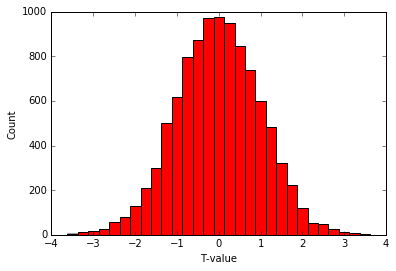

Randomization-based p-value:  0.0  Parametric P-value:  [ 0.00013572]


In [116]:
# how many times do we want to randomize the data and then eval our
# test statistic again?
num_randomizations = 10000

# allocate a matrix to store the output
rand_t = np.zeros(num_randomizations)

# matrix to store our t-values under the null that condition labels don't matter
null_t_val = np.zeros(num_randomizations)

# start a loop to iterate over randomizations of condition labels
for i in np.arange(num_randomizations):
    
    # conceptualize the randomization as randomly changing the sign of the difference 
    # between each pair of entries in d1 and d2
    # note: bonus points for figuring out one small flaw in this line of code...
    rand_data = np.sign(np.random.rand(N,1)-.5) * (d1-d2)
    
    null_t_val[i] = np.mean(rand_data, axis=0) / (np.std(rand_data, axis=0) / np.sqrt(N-1))
    
#show the distribution of tvals under the null
plt.hist(null_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

# now print out our mean t-value under the null, and the associated pvalue
# that is generated by comparing our observed t-value with the distribution
# of tvalues under the null!
rand_p_value = 2*(1-np.sum(study_t_val>null_t_val) / num_randomizations)
print('Randomization-based p-value: ', rand_p_value, ' Parametric P-value: ', p_value)


## Using bootstrapping to estimate how well models generalize...

Basic background: Imagine you do a typical experiment in your lab. You run a subject  (human/rodent/whatever) through your memory/perception test and you get a 100 numbers, one number that indexes the magnitude of your  dependent variable on each trial (RTs/Accuracy/EEG amplitude/spike rate/GSR/etc). Now, you compute your mean over your 100 samples and get 10 (spikes/%cor/etc). Now you might reasonably wonder: this subject produced a mean score of  10 on my test, but what if I were to run her again? Would I get the same number? What if she participated 1,000 times on the test? Would I get 10 every time? 
[note that similar questions can be asked about population-level stats, 
which will be part of your problem set this week]. So the problem is that you're in a situation where you want to know the 
reliability of a number (i.e. the central tendency of 10), but you only get to make your measurements 1 time (or a limited number of times). There are several ways that you can estimate the number's reliability, but one of the best is to do a bootstrapping analysis, which estimates the variance of your condition mean by resampling the 100 trials you obtained with replacement to see how stable the central tendency is after boot strapping you end up with a confidence interval (CI) on data from this subject - idea is that we can estimate how certain we are of a mean that we observe from this subject - and we can do that either by repeatedly re-sampling from the observed data with replacement, or by re-running the subject N times

In [ ]:
from sklearn.utils import sk  # to get the resample function

In [ ]:
# generate a data set
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)

print('Bootstrap Sample: %s' % boot)
# out of bag observations

oob = [x for x in data if x not in boot]

print('OOB Sample: %s' % oob)